# US Regional Sales: A Linear Regression Approach 

##  Importing Library

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading Dataset

In [2]:
df = pd.read_csv('US_Regional_Sales_Data.csv')
df 

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18   
1      SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18   
2      SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18   
3      SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   
4      SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18   
...            ...           ...           ...          ...       ...   
7986  SO - 0008087      In-Store  WARE-MKL1006      26/9/20  30/12/20   
7987  SO - 0008088        Online  WARE-NMK1003      26/9/20  30/12/20   
7988  SO - 0008089        Online  WARE-UHY1004      26/9/20  30/12/20   
7989  SO - 0008090        Online  WARE-NMK1003      26/9/20  30/12/20   
7990  SO - 0008091      In-Store  WARE-UHY1004      26/9/20  30/12/20   

     ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  \
0     14/6/18      19/6/18          USD             6           15       259   
1     22/6/18       2/7/18          USD            14           20       196   
2     21/6/18       1/7/18          USD            21           16       213   
3      2/6/18       7/6/18          USD            28           48       107   
4     16/6/18      26/6/18          USD            22           49       111   
...       ...          ...          ...           ...          ...       ...   
7986   7/1/21      14/1/21          USD             9           41       339   
7987   2/1/21       4/1/21          USD            14           29       202   
7988  23/1/21      26/1/21          USD            14           32       241   
7989  20/1/21      25/1/21          USD            20           42       112   
7990  13/1/21      19/1/21          USD             6           41       237   

      _ProductID  Order Quantity  Discount Applied Unit Cost Unit Price  
0             12               5             0.075  1,001.18   1,963.10  
1             27               3             0.075  3,348.66   3,939.60  
2             16               1             0.050    781.22   1,775.50  
3             23               8             0.075  1,464.69   2,324.90  
4             26               8             0.100  1,476.14   1,822.40  
...          ...             ...               ...       ...        ...  
7986          29               1             0.075    121.94      234.5  
7987           3               6             0.050  1,921.56   3,202.60  
7988          35               5             0.200  2,792.76   3,825.70  
7989          36               8             0.100       804   1,072.00  
7990          43               5             0.075  1,370.82   2,211.00  

[7991 rows x 16 columns]

## Data Exploration

In [3]:
df.shape

(7991, 16)

In [4]:
df.size

127856

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [6]:
df.sample(5)

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  \
4736  SO - 0004837        Online  WARE-NMK1003      23/8/19  16/12/19   
4022  SO - 0004123     Wholesale  WARE-PUJ1005      15/5/19   20/9/19   
6166  SO - 0006267      In-Store  WARE-NMK1003      1/12/19   31/5/20   
5911  SO - 0006012      In-Store  WARE-XYS1001      1/12/19    1/5/20   
6514  SO - 0006615      In-Store  WARE-PUJ1005      10/3/20   11/7/20   

      ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  \
4736  20/12/19     25/12/19          USD            20           22       162   
4022   8/10/19      9/10/19          USD            27           29       315   
6166   13/6/20      19/6/20          USD             3           39       165   
5911    9/5/20      13/5/20          USD             8            7        41   
6514   18/7/20      26/7/20          USD             3           42       280   

      _ProductID  Order Quantity  Discount Applied Unit Cost Unit Price  
4736           4               1             0.075    568.16   1,072.00  
4022          39               6             0.300       108      174.2  
6166          38               7             0.050  2,260.11   3,705.10  
5911           9               8             0.050     95.68      227.8  
6514          19               1             0.150  2,925.35   5,132.20

In [7]:
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18  14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied Unit Cost Unit Price  
0               5             0.075  1,001.18   1,963.10  
1               3             0.075  3,348.66   3,939.60  
2               1             0.050    781.22   1,775.50  
3               8             0.075  1,464.69   2,324.90  
4               8             0.100  1,476.14   1,822.40

In [8]:
df.tail()

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  \
7986  SO - 0008087      In-Store  WARE-MKL1006      26/9/20  30/12/20   
7987  SO - 0008088        Online  WARE-NMK1003      26/9/20  30/12/20   
7988  SO - 0008089        Online  WARE-UHY1004      26/9/20  30/12/20   
7989  SO - 0008090        Online  WARE-NMK1003      26/9/20  30/12/20   
7990  SO - 0008091      In-Store  WARE-UHY1004      26/9/20  30/12/20   

     ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  \
7986   7/1/21      14/1/21          USD             9           41       339   
7987   2/1/21       4/1/21          USD            14           29       202   
7988  23/1/21      26/1/21          USD            14           32       241   
7989  20/1/21      25/1/21          USD            20           42       112   
7990  13/1/21      19/1/21          USD             6           41       237   

      _ProductID  Order Quantity  Discount Applied Unit Cost Unit Price  
7986          29               1             0.075    121.94      234.5  
7987           3               6             0.050  1,921.56   3,202.60  
7988          35               5             0.200  2,792.76   3,825.70  
7989          36               8             0.100       804   1,072.00  
7990          43               5             0.075  1,370.82   2,211.00

In [9]:
df.describe(include = 'all')

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  \
count          7991          7991          7991         7991      7991   
unique         7991             4             6           11       945   
top     SO - 000101      In-Store  WARE-NMK1003      18/6/20    4/8/18   
freq              1          3298          2505          865        21   
mean            NaN           NaN           NaN          NaN       NaN   
std             NaN           NaN           NaN          NaN       NaN   
min             NaN           NaN           NaN          NaN       NaN   
25%             NaN           NaN           NaN          NaN       NaN   
50%             NaN           NaN           NaN          NaN       NaN   
75%             NaN           NaN           NaN          NaN       NaN   
max             NaN           NaN           NaN          NaN       NaN   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  \
count      7991         7991         7991   7991.000000  7991.000000   
unique      966          966            1           NaN          NaN   
top     12/8/19      13/6/20          USD           NaN          NaN   
freq         18           18         7991           NaN          NaN   
mean        NaN          NaN          NaN     14.384307    25.457014   
std         NaN          NaN          NaN      7.986086    14.414883   
min         NaN          NaN          NaN      1.000000     1.000000   
25%         NaN          NaN          NaN      8.000000    13.000000   
50%         NaN          NaN          NaN     14.000000    25.000000   
75%         NaN          NaN          NaN     21.000000    38.000000   
max         NaN          NaN          NaN     28.000000    50.000000   

           _StoreID   _ProductID  Order Quantity  Discount Applied Unit Cost  \
count   7991.000000  7991.000000     7991.000000       7991.000000      7991   
unique          NaN          NaN             NaN               NaN      5252   
top             NaN          NaN             NaN               NaN      93.8   
freq            NaN          NaN             NaN               NaN         9   
mean     183.850081    23.771743        4.525341          0.114394       NaN   
std      105.903946    13.526545        2.312631          0.085570       NaN   
min        1.000000     1.000000        1.000000          0.050000       NaN   
25%       91.000000    12.000000        3.000000          0.050000       NaN   
50%      183.000000    24.000000        5.000000          0.075000       NaN   
75%      276.000000    36.000000        7.000000          0.150000       NaN   
max      367.000000    47.000000        8.000000          0.400000       NaN   

       Unit Price  
count        7991  
unique        664  
top      1,051.90  
freq           87  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

## Checking for missing values

In [10]:
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [11]:
df.duplicated().sum()

0

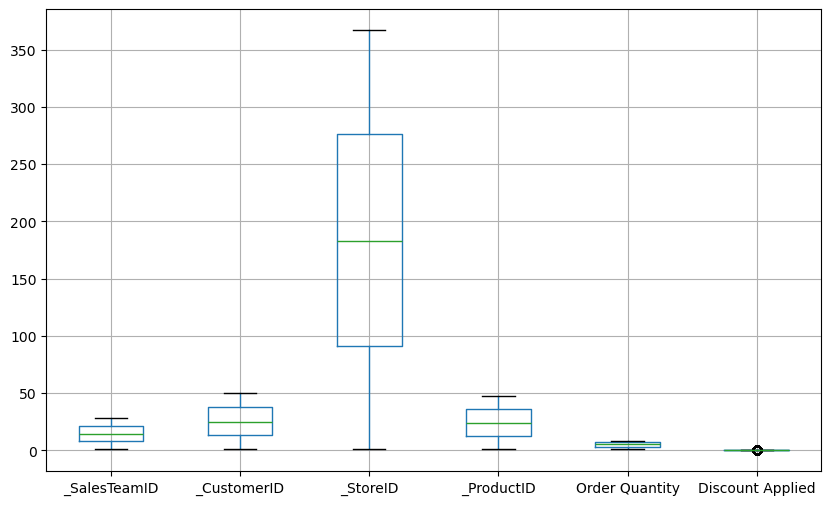

In [12]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.show()

In [13]:
df.nunique()

OrderNumber         7991
Sales Channel          4
WarehouseCode          6
ProcuredDate          11
OrderDate            945
ShipDate             966
DeliveryDate         966
CurrencyCode           1
_SalesTeamID          28
_CustomerID           50
_StoreID             367
_ProductID            47
Order Quantity         8
Discount Applied       7
Unit Cost           5252
Unit Price           664
dtype: int64

In [14]:
df = df.drop(['OrderNumber','CurrencyCode'],axis = 1)

In [15]:
df

Sales Channel WarehouseCode ProcuredDate OrderDate ShipDate DeliveryDate  \
0         In-Store  WARE-UHY1004     31/12/17   31/5/18  14/6/18      19/6/18   
1           Online  WARE-NMK1003     31/12/17   31/5/18  22/6/18       2/7/18   
2      Distributor  WARE-UHY1004     31/12/17   31/5/18  21/6/18       1/7/18   
3        Wholesale  WARE-NMK1003     31/12/17   31/5/18   2/6/18       7/6/18   
4      Distributor  WARE-NMK1003      10/4/18   31/5/18  16/6/18      26/6/18   
...            ...           ...          ...       ...      ...          ...   
7986      In-Store  WARE-MKL1006      26/9/20  30/12/20   7/1/21      14/1/21   
7987        Online  WARE-NMK1003      26/9/20  30/12/20   2/1/21       4/1/21   
7988        Online  WARE-UHY1004      26/9/20  30/12/20  23/1/21      26/1/21   
7989        Online  WARE-NMK1003      26/9/20  30/12/20  20/1/21      25/1/21   
7990      In-Store  WARE-UHY1004      26/9/20  30/12/20  13/1/21      19/1/21   

      _SalesTeamID  _CustomerID  _StoreID  _ProductID  Order Quantity  \
0                6           15       259          12               5   
1               14           20       196          27               3   
2               21           16       213          16               1   
3               28           48       107          23               8   
4               22           49       111          26               8   
...            ...          ...       ...         ...             ...   
7986             9           41       339          29               1   
7987            14           29       202           3               6   
7988            14           32       241          35               5   
7989            20           42       112          36               8   
7990             6           41       237          43               5   

      Discount Applied Unit Cost Unit Price  
0                0.075  1,001.18   1,963.10  
1                0.075  3,348.66   3,939.60  
2                0.050    781.22   1,775.50  
3                0.075  1,464.69   2,324.90  
4                0.100  1,476.14   1,822.40  
...                ...       ...        ...  
7986             0.075    121.94      234.5  
7987             0.050  1,921.56   3,202.60  
7988             0.200  2,792.76   3,825.70  
7989             0.100       804   1,072.00  
7990             0.075  1,370.82   2,211.00  

[7991 rows x 14 columns]

In [16]:
date_columns = ['ProcuredDate','OrderDate','ShipDate','DeliveryDate']

df[date_columns] = df[date_columns].apply(lambda x: x.str.replace('/', '').astype(np.int64))

In [17]:
df['Unit Cost'] = df['Unit Cost'].str.replace(',','').astype('float')
df['Unit Price'] = df['Unit Price'].str.replace(',','').astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales Channel     7991 non-null   object 
 1   WarehouseCode     7991 non-null   object 
 2   ProcuredDate      7991 non-null   int64  
 3   OrderDate         7991 non-null   int64  
 4   ShipDate          7991 non-null   int64  
 5   DeliveryDate      7991 non-null   int64  
 6   _SalesTeamID      7991 non-null   int64  
 7   _CustomerID       7991 non-null   int64  
 8   _StoreID          7991 non-null   int64  
 9   _ProductID        7991 non-null   int64  
 10  Order Quantity    7991 non-null   int64  
 11  Discount Applied  7991 non-null   float64
 12  Unit Cost         7991 non-null   float64
 13  Unit Price        7991 non-null   float64
dtypes: float64(3), int64(9), object(2)
memory usage: 874.1+ KB


## Distribution of Unit Price

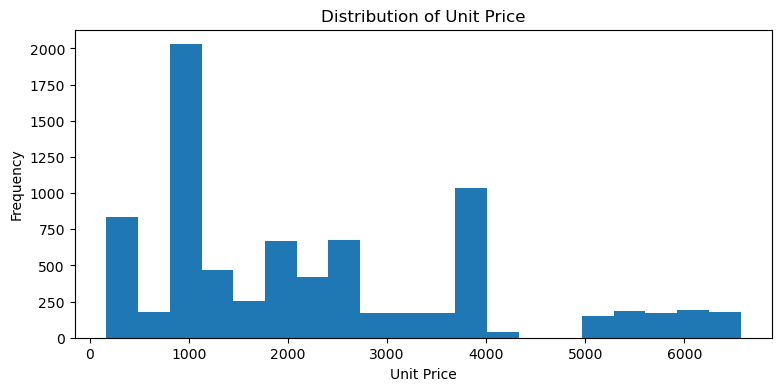

In [19]:
plt.figure(figsize=(9,4))
plt.hist(x=df['Unit Price'],bins=20)
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.show()

##### The histogram displays a right-skewed distribution of unit prices for product. This might be due to a higher prevalence of lower-priced basic product compared to a smaller number of more expensive product.As the result, focusing on strategies to increase sales of higher price product.

## Distribution of Sales by Channel

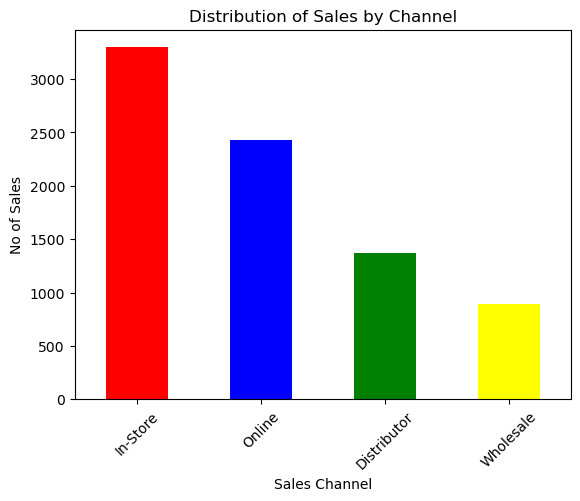

In [20]:
channel_count = df['Sales Channel'].value_counts()
channel_count

channel_count.plot(kind = 'bar',color=['red', 'blue', 'green', 'yellow'] )
plt.xlabel('Sales Channel')
plt.ylabel('No of Sales')
plt.xticks(rotation = 45)
plt.title('Distribution of Sales by Channel')
plt.show()

##### The bar chart reveals the distribution of sales across different sales channels.In store sales lead in sales count, followed by online ,distributor and wholesale. This suggests instore sales are the most dominant sales channel, capturing a significant share of total sales.The lower contribution of online sales might be due to factors like the need for customers to physically experience the products before buying.

In [65]:
Product_Id =  df.groupby('_ProductID')['Order Quantity'].count().reset_index(name='Total_Count')


ProductID = Product_Id.sort_values(by= 'Total_Count',ascending = False)


Top5ProductID = ProductID.head(10)
Top5ProductID

_ProductID  Total_Count
36          37          200
3            4          200
7            8          195
22          23          194
26          27          190
39          40          184
37          38          183
45          46          182
10          11          182
11          12          181

## Top 10 Best Selling Products

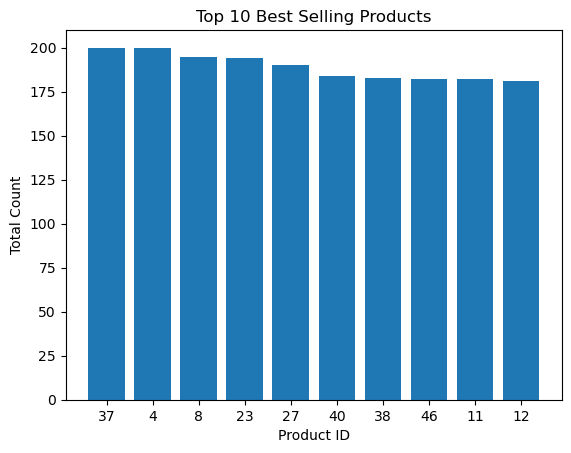

In [61]:
productid_list = Top5ProductID['_ProductID'].apply(str).tolist() 
total_count_list = Top5ProductID['Total_Count'].tolist()
plt.bar(productid_list,total_count_list)
plt.xlabel('Product ID')
plt.ylabel('Total Count')
plt.title('Top 10 Best Selling Products')
plt.show()

In [62]:
SalesTeam_Id =  df.groupby('_SalesTeamID')['Order Quantity'].count().reset_index(name='Total_Count')


SalesTeamID = SalesTeam_Id.sort_values(by= 'Total_Count',ascending = False)


Top5SalesTeam = SalesTeamID.head(10)
Top5SalesTeam

_SalesTeamID  Total_Count
12            13          340
17            18          316
7              8          315
11            12          314
6              7          303
0              1          302
15            16          298
2              3          296
25            26          296
20            21          296

## Top Performing Sales Team

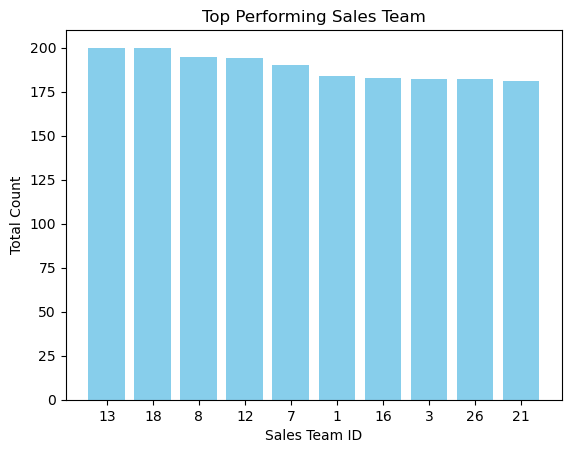

In [64]:
salesteam_list = Top5SalesTeam['_SalesTeamID'].apply(str).tolist() 
total_count_list = Top5ProductID['Total_Count'].tolist()
plt.bar(salesteam_list,total_count_list,color='skyblue')
plt.xlabel('Sales Team ID')
plt.ylabel('Total Count')
plt.title('Top Performing Sales Team')
plt.show()

<Figure size 1000x600 with 0 Axes>

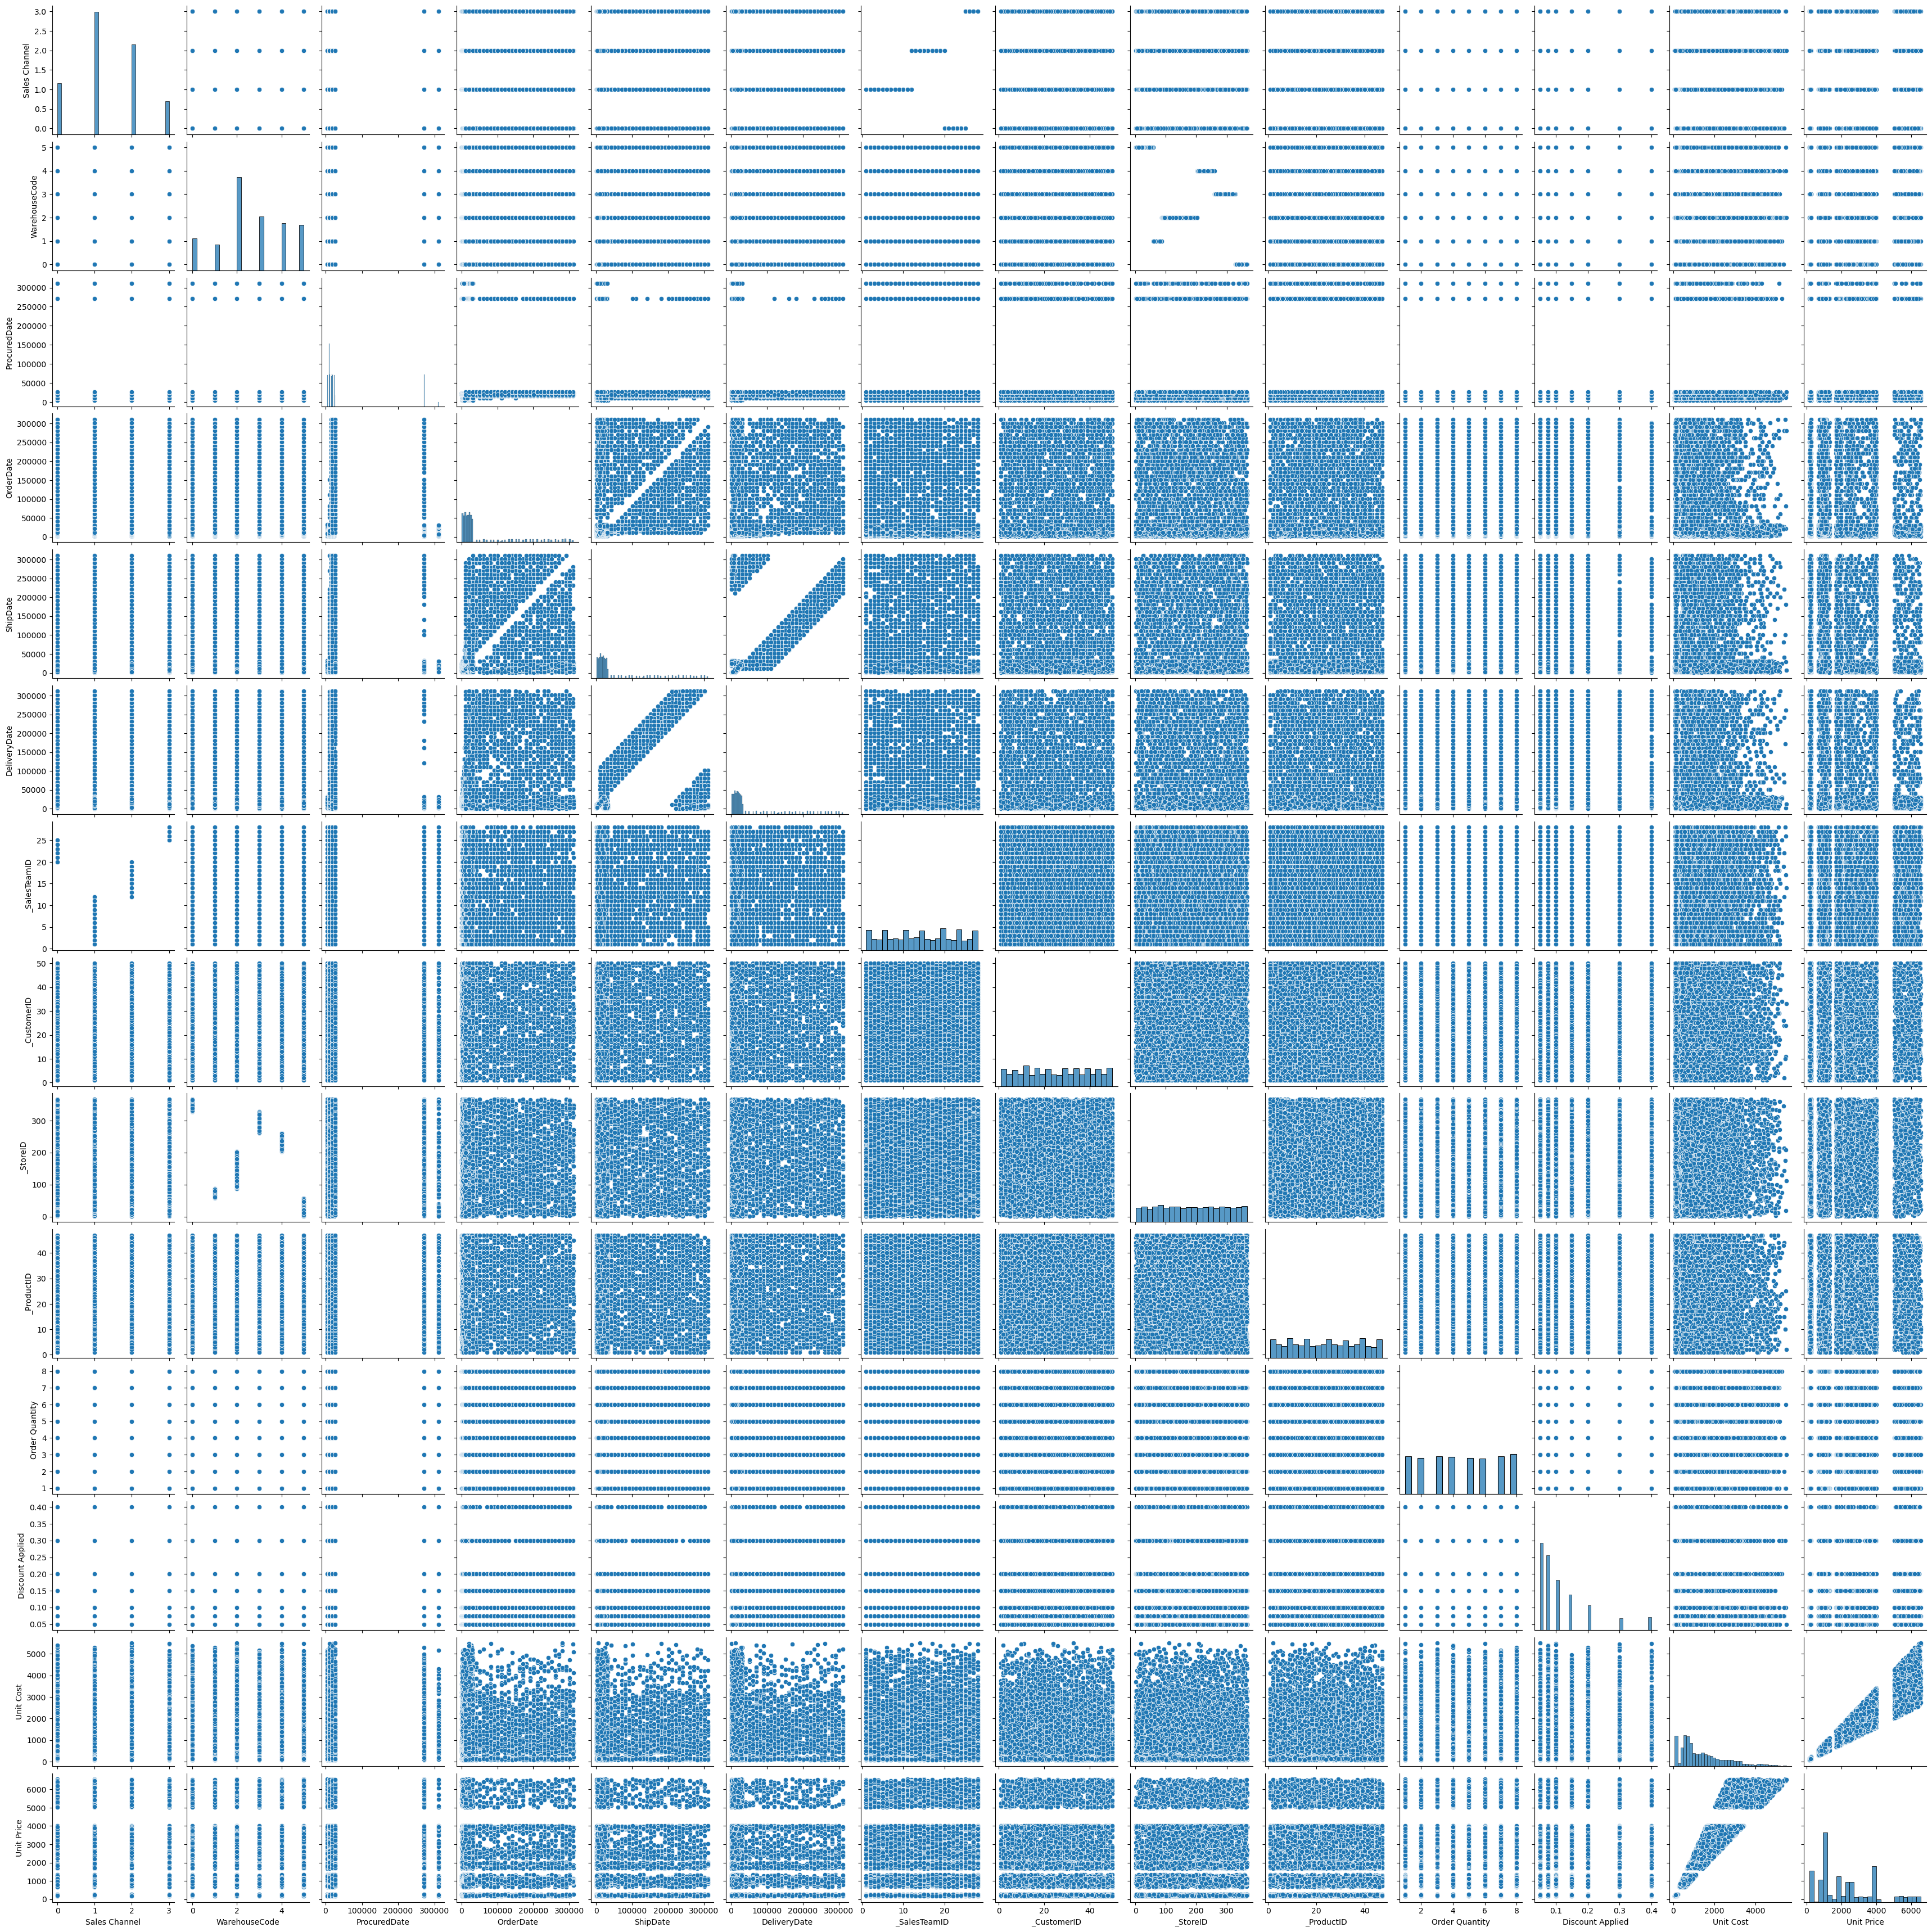

In [83]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

## Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns = ['Sales Channel','WarehouseCode']

for col in columns:
    df[col] = encoder.fit_transform(df[col])

In [85]:
df.columns

Index(['Sales Channel', 'WarehouseCode', 'ProcuredDate', 'OrderDate',
       'ShipDate', 'DeliveryDate', '_SalesTeamID', '_CustomerID', '_StoreID',
       '_ProductID', 'Order Quantity', 'Discount Applied', 'Unit Cost',
       'Unit Price'],
      dtype='object')

## Split Test and Train

In [86]:
X = df.drop(columns= ['ProcuredDate', 'OrderDate',
       'ShipDate', 'DeliveryDate','Unit Price'])
y = df['Unit Price']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=1)

## LINEAR REGRESSION

In [88]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [104]:
y_pred = model.predict(X_test)
y_pred

array([1583.39911469,  815.29785037, 2211.15894416, ..., 1537.9296669 ,
       1318.80529377, 1086.68768133])

In [105]:
y_pred_train = model.predict(X_train)
y_pred_train

array([2540.21493202,  912.60419796, 1001.24469938, ..., 4649.65628437,
       4194.29308431, 4511.08169274])

In [92]:
coef = model.coef_
coef

array([-1.20789353e+01, -3.58201312e+00,  4.33786667e-01,  7.80505105e-01,
       -5.21496742e-02, -1.09040678e+00,  3.76335876e+00,  9.79402087e+01,
        1.41202807e+00])

In [99]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".
          format(col_name, model.coef_[idx]))

The coefficient for Sales Channel is -12.078935257977415
The coefficient for WarehouseCode is -3.582013121651416
The coefficient for _SalesTeamID is 0.43378666654447523
The coefficient for _CustomerID is 0.780505104890489
The coefficient for _StoreID is -0.05214967424268419
The coefficient for _ProductID is -1.0904067754038738
The coefficient for Order Quantity is 3.7633587557791532
The coefficient for Discount Applied is 97.94020873177743
The coefficient for Unit Cost is 1.412028068049473


In [100]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 264.1018257754729


In [103]:
model.score(X_train,y_train)

0.8877117429906349

In [102]:
model.score(X_test,y_test)

0.8873559705921088

* Model Perfromance :

* R2 ( Train) - 0.88
* R2 (Test) - 0.88
- The model was able to perform good in both train and test data . Hence, the model seems to be good fit model

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.8873559705921088
Mean Squared Error: 327972.97400003584
Mean Absolute Error: 415.9086349478224


The model shows a good fit (R²=0.887) 